# **This COLAB NOTEBOOK is responsible for handling the SVM classifier for the dataset. It trains the model on both the descriptors, visualises the performance. And then evaluates. Based on the same, a Grid Search is performed.**

In [ ]:
!nvidia-smi

Tue Nov 12 23:57:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This helps in the visualising bit

CATEGORIES_DICT = {
    1: ["grass", "cow"],
    2: ["tree", "grass", "sky"],
    3: ["building", "sky"],
    4: ["aeroplane", "grass", "sky"],
    5: ["cow", "grass", "mount"],
    6: ["face", "body"],
    7: ["car", "building"],
    8: ["bike", "building"],
    9: ["sheep", "grass"],
    10: ["flower"],
    11: ["sign"],
    12: ["bird", "sky", "grass", "water"],
    13: ["book"],
    14: ["chair"],
    15: ["cat"],
    16: ["dog"],
    17: ["road", "building"],
    18: ["water", "boat"],
    19: ["body", "face"],
    20: ["water", "boat", "sky", "mount"]
}


In [ ]:
%cd "/content/drive/MyDrive/SURREY (UK)/SEM 1/CVPR/Skeleton_Python_revised"

/content/drive/MyDrive/SURREY (UK)/SEM 1/CVPR/Skeleton_Python_revised


In [ ]:
import os
import numpy as np
import scipy.io as sio

DESCRIPTOR_FOLDER = 'descriptors'
IMAGE_FOLDER = '../MSRC_ObjCategImageDatabase_v2/Images'

def load_descriptors(descriptor_subfolder):
    all_feats = []
    all_files = []
    full_path = os.path.join(DESCRIPTOR_FOLDER, descriptor_subfolder)
    for filename in os.listdir(full_path):
        if filename.endswith('.mat'):
            file_path = os.path.join(full_path, filename)
            img_data = sio.loadmat(file_path)
            all_files.append(filename.replace(".mat", ".bmp"))  # Storing image filename for visualization
            all_feats.append(img_data['F'][0])  # 'F' is a 1D array in .mat
    return np.array(all_feats, dtype="object"), all_files

# Load features from 'globalRGBhisto' subfolder
features_globalRGBhisto, files_globalRGBhisto = load_descriptors('globalRGBhisto')

# Load features from 'spatialGrid' subfolder
features_spatialGrid, files_spatialGrid = load_descriptors('spatialGrid')


# **FOR COLOR HISTOGRAM**

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# for Color Histogram
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_globalRGBhisto, files_globalRGBhisto, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier
clf = svm.SVC(kernel='rbf', C=1, gamma='auto')
clf.fit(X_train, y_train)


SVC(C=1, gamma='auto')

In [ ]:
y_pred = clf.predict(X_test)

*Visual Search*

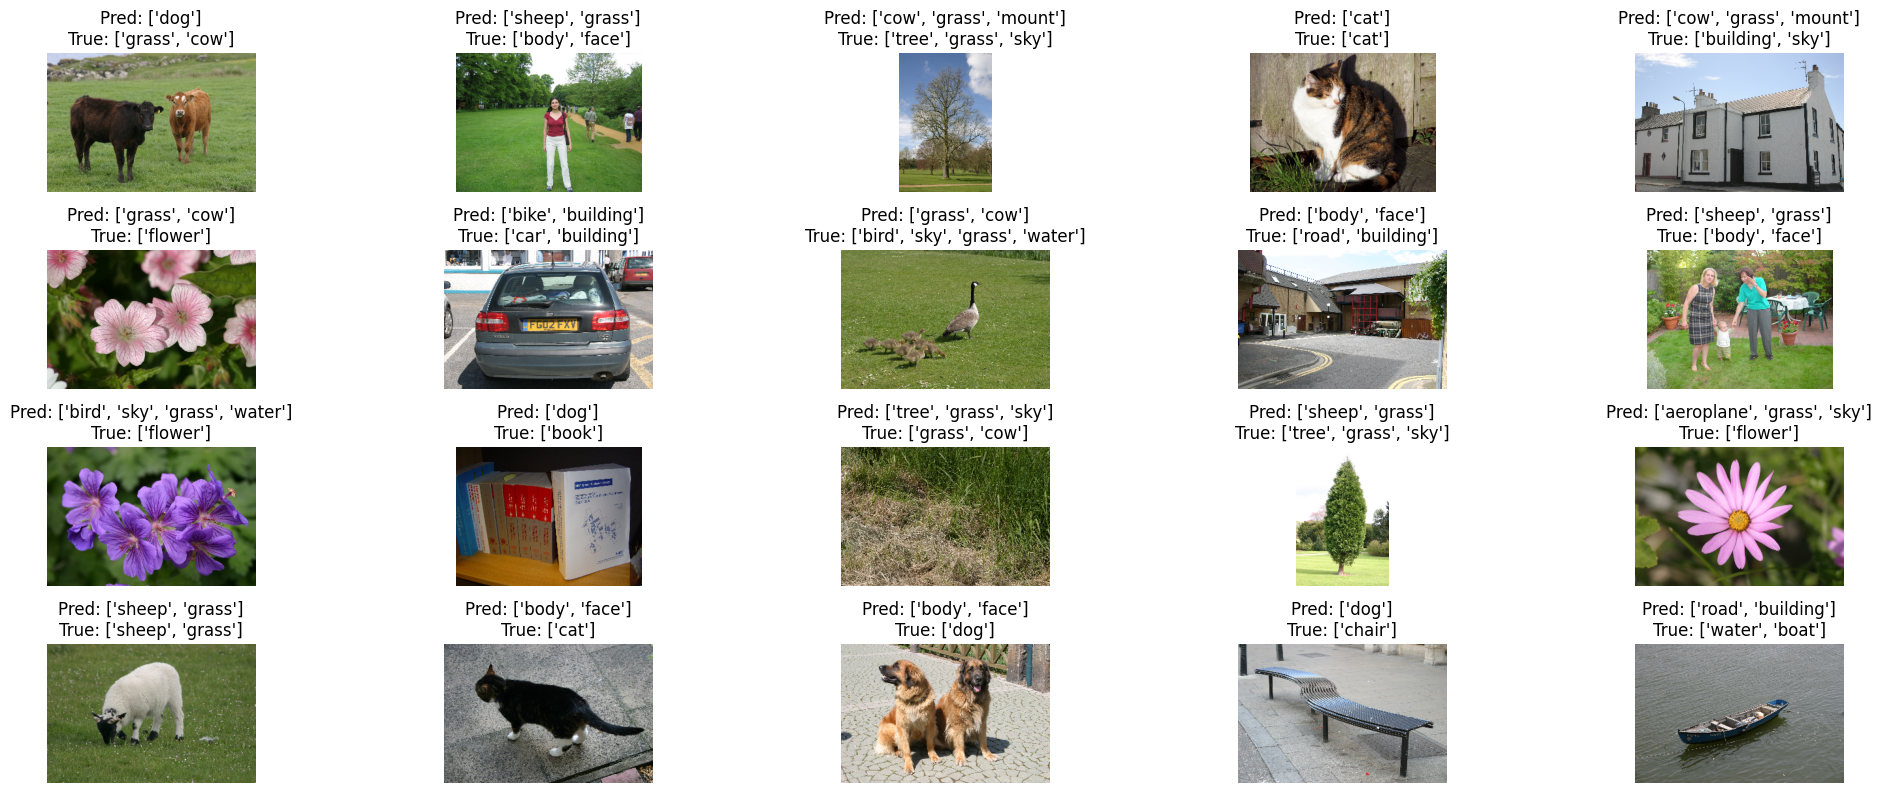

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import random

def plot_predictions(filenames, predictions, true_labels, directory, num_samples=20):
    """
    Plot a comparison of predictions and true labels for a set of images.

    Args:
    filenames (list): List of image file names.
    predictions (list): List of predicted labels.
    true_labels (dict): Dictionary mapping filenames to true labels.
    directory (str): Path to the directory containing the images.
    num_samples (int): Number of samples to plot.
    """
    random.shuffle(filenames) # plotting random 20 samples
    num_samples = min(num_samples, len(filenames))
    plt.figure(figsize=(20, 10))

    for i in range(num_samples):
        ax = plt.subplot(int(num_samples / 5) + 1, 5, i + 1)
        img_path = os.path.join(directory, filenames[i])
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
        else:
            continue

        predicted_label = true_labels[int(predictions[i].split("_")[0])]
        actual_label = true_labels[int(y_test[i].split("_")[0])]
        title = f'Pred: {predicted_label}\nTrue: {actual_label}'
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

plot_predictions(y_test, y_pred, CATEGORIES_DICT, IMAGE_FOLDER)


*Evaluating the Performance*

In [ ]:
y_pred_new = [CATEGORIES_DICT[int(n.split("_")[0])] for n in y_pred]
y_true = [CATEGORIES_DICT[int(n.split("_")[0])] for n in y_test]
y_pred_new[:20], y_true[:20]

In [ ]:
class_labels = [CATEGORIES_DICT[i] for i in range(1,len(CATEGORIES_DICT) +1 )]
class_labels

Multilabel Confusion Matrix:
 [[[106   6]
  [  6   1]]

 [[109   2]
  [  8   0]]

 [[ 98   8]
  [ 13   0]]

 [[105   7]
  [  7   0]]

 [[ 94  11]
  [ 14   0]]

 [[115   0]
  [  4   0]]

 [[ 80  16]
  [ 20   3]]

 [[106   5]
  [  8   0]]

 [[110   3]
  [  6   0]]

 [[106   9]
  [  4   0]]

 [[ 99  12]
  [  7   1]]

 [[ 98  13]
  [  8   0]]

 [[ 94  11]
  [ 14   0]]

 [[108   4]
  [  7   0]]

 [[ 44  32]
  [ 25  18]]

 [[109   6]
  [  4   0]]

 [[104   9]
  [  5   1]]

 [[ 98  14]
  [  6   1]]

 [[113   3]
  [  3   0]]

 [[ 70  18]
  [ 23   8]]

 [[104   7]
  [  8   0]]

 [[ 86  13]
  [ 18   2]]]
Classification Report:
               precision    recall  f1-score   support

   aeroplane       0.14      0.14      0.14         7
        bike       0.00      0.00      0.00         8
        bird       0.00      0.00      0.00        13
        boat       0.00      0.00      0.00         7
        body       0.00      0.00      0.00        14
        book       0.00      0.00      0.00      

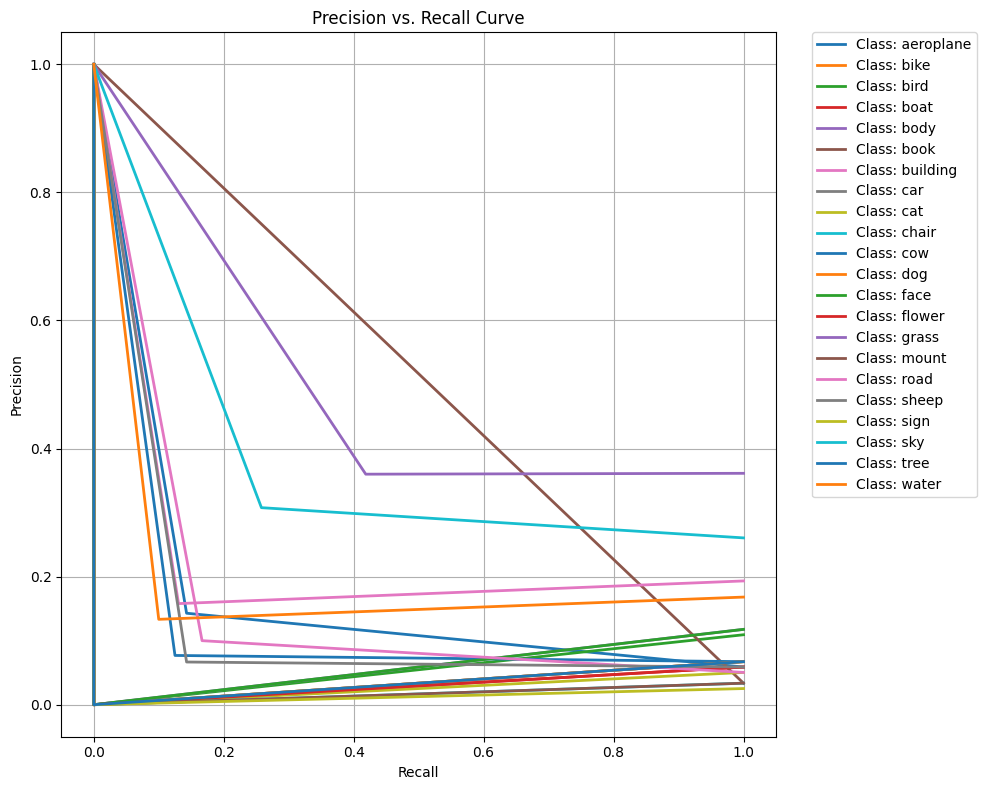

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report, precision_recall_curve
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the labels
mlb = MultiLabelBinarizer()
y_true_bin = mlb.fit_transform(y_true)
y_pred_bin = mlb.transform(y_pred_new)

# Generate multilabel confusion matrix
mcm = multilabel_confusion_matrix(y_true_bin, y_pred_bin)
print("Multilabel Confusion Matrix:\n", mcm)

# Calculate classification report which includes precision, recall, and F1-score
report = classification_report(y_true_bin, y_pred_bin, target_names=mlb.classes_, zero_division=0)
print("Classification Report:\n", report)

# Plot Precision-Recall curve for each class
precision = dict()
recall = dict()
threshold = dict()

plt.figure(figsize=(10, 8))
for i, label in enumerate(mlb.classes_):
    precision[i], recall[i], threshold[i] = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='Class: {}'.format(label))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs. Recall Curve")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.tight_layout()


*Performing Grid Search*

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score

# Binarize the labels
mlb = MultiLabelBinarizer()
y_train_bin = mlb.fit_transform(y_train)
y_test_bin = mlb.transform(y_test)

# Define the SVM with OneVsRest strategy
svc = SVC()
ovr_clf = OneVsRestClassifier(svc)

# Define the parameter grid
param_grid = {
    'estimator__C': [0.1, 1, 10],  # Regularization parameter
    'estimator__kernel': ['rbf', 'linear'],  # Type of SVM
    'estimator__gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
}

# Setup scoring function - Using F1 score for multilabel classification
f1_scorer = make_scorer(f1_score, average='macro', zero_division=0)

# Setup the grid search
grid_search = GridSearchCV(
    estimator=ovr_clf,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=3,  # Number of cross validation folds
    verbose=2  # Higher number gives more info during training
)

# Fit grid search
grid_search.fit(X_train, y_train_bin)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Evaluate the best model found by the grid search
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test_bin, y_pred, average='macro')
print("Test F1 Score of Best Model:", f1)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=0.1, estimator__gamma=scale, estimator__kernel=rbf; total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=0.1, estimator__gamma=scale, estimator__kernel=rbf; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=0.1, estimator__gamma=scale, estimator__kernel=rbf; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=0.1, estimator__gamma=scale, estimator__kernel=linear; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=0.1, estimator__gamma=scale, estimator__kernel=linear; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=0.1, estimator__gamma=scale, estimator__kernel=linear; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=0.1, estimator__gamma=auto, estimator__kernel=rbf; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=0.1, estimator__gamma=auto, estimator__kernel=rbf; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=0.1, estimator__gamma=auto, estimator__kernel=rbf; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=0.1, estimator__gamma=auto, estimator__kernel=linear; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=0.1, estimator__gamma=auto, estimator__kernel=linear; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=0.1, estimator__gamma=auto, estimator__kernel=linear; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=scale, estimator__kernel=rbf; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=scale, estimator__kernel=rbf; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=scale, estimator__kernel=rbf; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=scale, estimator__kernel=linear; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=scale, estimator__kernel=linear; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=scale, estimator__kernel=linear; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=auto, estimator__kernel=rbf; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=auto, estimator__kernel=rbf; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=auto, estimator__kernel=rbf; total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=auto, estimator__kernel=linear; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=auto, estimator__kernel=linear; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=auto, estimator__kernel=linear; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=scale, estimator__kernel=rbf; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=scale, estimator__kernel=rbf; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=scale, estimator__kernel=rbf; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=scale, estimator__kernel=linear; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=scale, estimator__kernel=linear; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=scale, estimator__kernel=linear; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=auto, estimator__kernel=rbf; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=auto, estimator__kernel=rbf; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=auto, estimator__kernel=rbf; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=auto, estimator__kernel=linear; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=auto, estimator__kernel=linear; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=auto, estimator__kernel=linear; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


Best Parameters: {'estimator__C': 1, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}
Best F1 Score: 0.5645969278937281
Test F1 Score of Best Model: 0.502805172261084


# **FOR SPATIAL GRID**

In [ ]:
# Check if all features have the same length
feature_lengths = [len(feature) for feature in features_spatialGrid]
if len(set(feature_lengths)) != 1:
    print("Inconsistent feature lengths found:", set(feature_lengths))


Inconsistent feature lengths found: {96, 94, 95}


In [ ]:
import numpy as np

# Determine the maximum length of any feature in your dataset
max_len = max(len(f) for f in features_spatialGrid)

# Pad each feature vector to the maximum length
features_spatialGrid_padded = [np.pad(f, (0, max_len - len(f)), mode='constant') for f in features_spatialGrid]


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

max_len = max(len(f) for f in features_spatialGrid)
features_spatialGrid_padded = np.array([np.pad(f, (0, max_len - len(f)), mode='constant') for f in features_spatialGrid])

# Split data into training and testing sets
X_train_sg, X_test_sg, y_train_sg, y_test_sg = train_test_split(features_spatialGrid_padded, files_spatialGrid, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_sg = scaler.fit_transform(X_train_sg)
X_test_sg = scaler.transform(X_test_sg)

# Create an SVM classifier
clf = svm.SVC(kernel='rbf', C=1, gamma='auto')
clf.fit(X_train_sg, y_train_sg)


SVC(C=1, gamma='auto')

In [ ]:
y_pred_sg = clf.predict(X_test_sg)

*Visual Search*

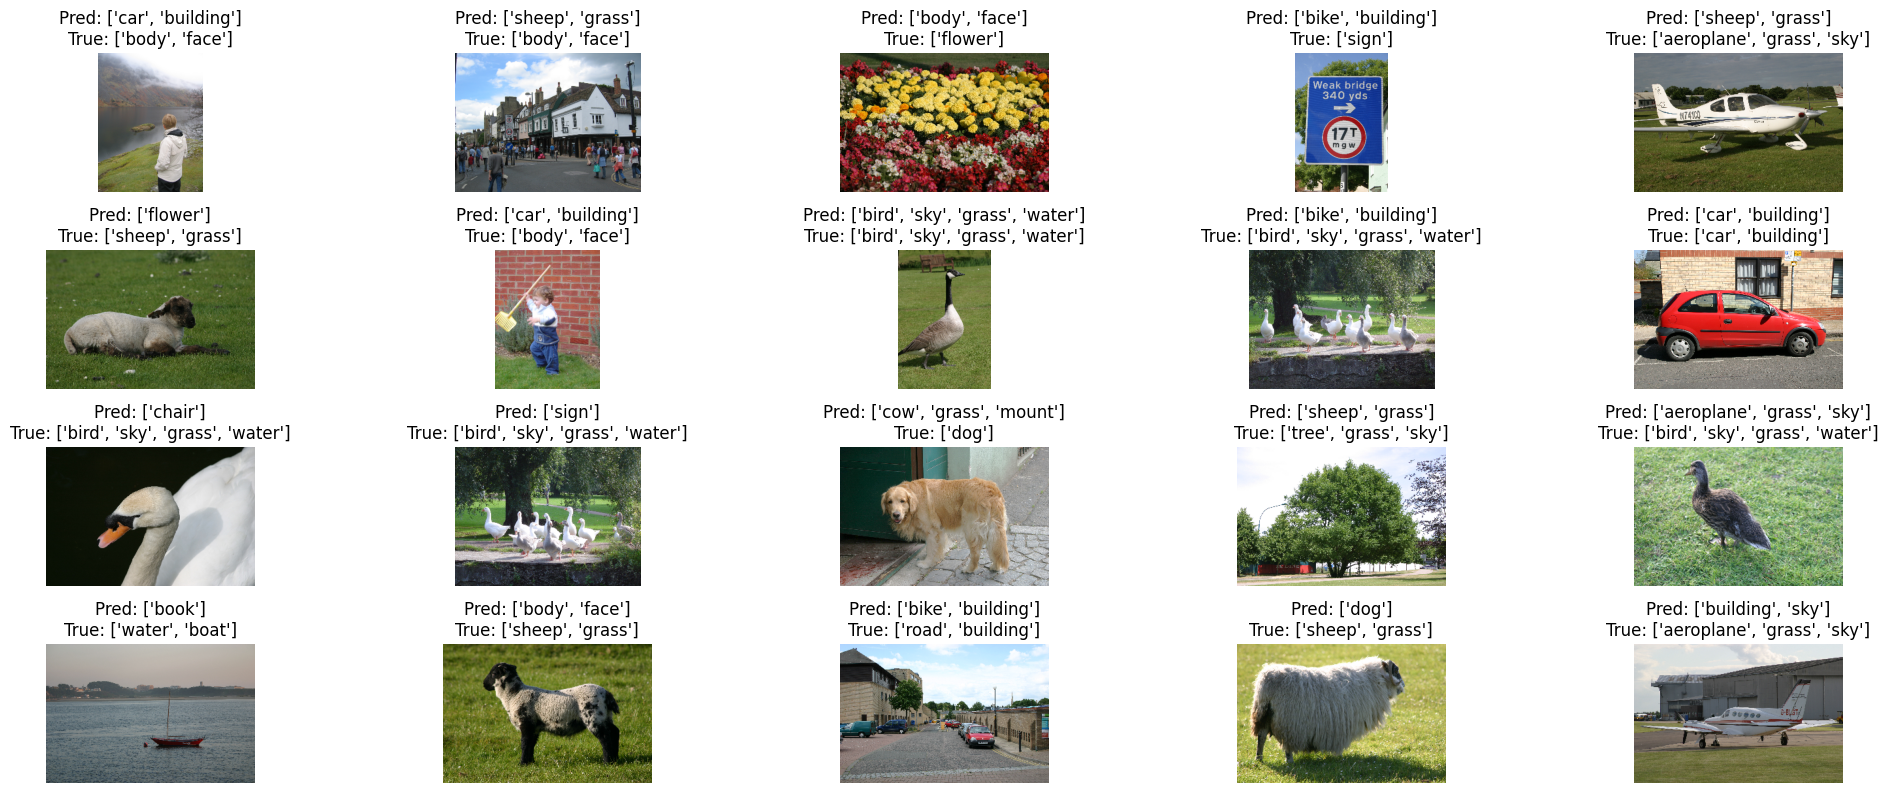

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import random

def plot_predictions(filenames, predictions, true_labels, directory, num_samples=20):
    """
    Plot a comparison of predictions and true labels for a set of images.

    Args:
    filenames (list): List of image file names.
    predictions (list): List of predicted labels.
    true_labels (dict): Dictionary mapping filenames to true labels.
    directory (str): Path to the directory containing the images.
    num_samples (int): Number of samples to plot.
    """
    random.shuffle(filenames)
    num_samples = min(num_samples, len(filenames))
    plt.figure(figsize=(20, 10))

    for i in range(num_samples):
        ax = plt.subplot(int(num_samples / 5) + 1, 5, i + 1)
        img_path = os.path.join(directory, filenames[i])
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
        else:
            continue

        predicted_label = true_labels[int(predictions[i].split("_")[0])]
        actual_label = true_labels[int(y_test_sg[i].split("_")[0])]
        title = f'Pred: {predicted_label}\nTrue: {actual_label}'
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

plot_predictions(y_test_sg, y_pred_sg, CATEGORIES_DICT, IMAGE_FOLDER)


*Evaluating the Performance*

In [ ]:
y_pred_new_sg = [CATEGORIES_DICT[int(n.split("_")[0])] for n in y_pred_sg]
y_true_sg = [CATEGORIES_DICT[int(n.split("_")[0])] for n in y_test_sg]
y_pred_new_sg[:10], y_true_sg[:10]

Multilabel Confusion Matrix:
 [[[105   7]
  [  7   0]]

 [[102   9]
  [  7   1]]

 [[103   3]
  [ 11   2]]

 [[107   5]
  [  6   1]]

 [[ 97   8]
  [ 14   0]]

 [[112   3]
  [  4   0]]

 [[ 78  18]
  [ 16   7]]

 [[102   9]
  [  7   1]]

 [[109   5]
  [  5   0]]

 [[110   4]
  [  5   0]]

 [[ 92  19]
  [  8   0]]

 [[104   7]
  [  8   0]]

 [[ 97   8]
  [ 14   0]]

 [[104   8]
  [  7   0]]

 [[ 48  28]
  [ 25  18]]

 [[109   6]
  [  3   1]]

 [[112   1]
  [  6   0]]

 [[103   9]
  [  7   0]]

 [[109   7]
  [  3   0]]

 [[ 71  17]
  [ 25   6]]

 [[106   5]
  [  7   1]]

 [[ 92   7]
  [ 16   4]]]
Classification Report:
               precision    recall  f1-score   support

   aeroplane       0.00      0.00      0.00         7
        bike       0.10      0.12      0.11         8
        bird       0.40      0.15      0.22        13
        boat       0.17      0.14      0.15         7
        body       0.00      0.00      0.00        14
        book       0.00      0.00      0.00      

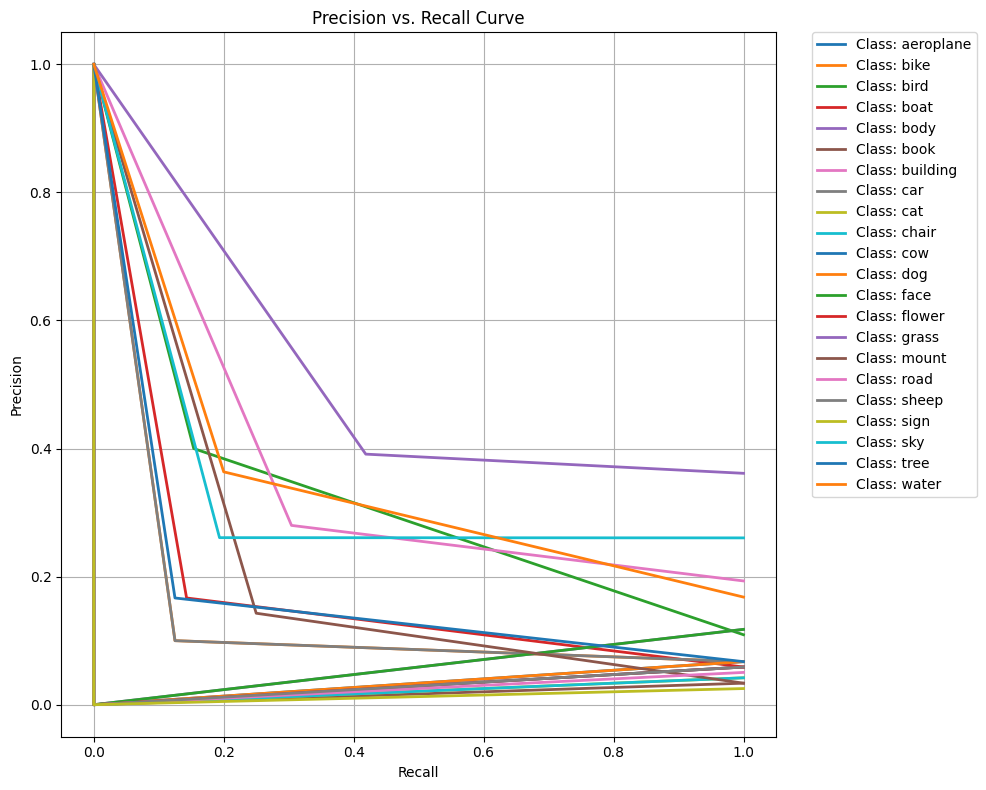

In [ ]:

# Binarize the labels
mlb = MultiLabelBinarizer()
y_true_bin = mlb.fit_transform(y_true_sg)
y_pred_bin = mlb.transform(y_pred_new_sg)

# Generate multilabel confusion matrix
mcm = multilabel_confusion_matrix(y_true_bin, y_pred_bin)
print("Multilabel Confusion Matrix:\n", mcm)

# Calculate classification report which includes precision, recall, and F1-score
report = classification_report(y_true_bin, y_pred_bin, target_names=mlb.classes_, zero_division=0)
print("Classification Report:\n", report)

# Plot Precision-Recall curve for each class
precision = dict()
recall = dict()
threshold = dict()

plt.figure(figsize=(10, 8))  # Adjust size to give more room for the legend
for i, label in enumerate(mlb.classes_):
    precision[i], recall[i], threshold[i] = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='Class: {}'.format(label))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs. Recall Curve")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)  # Move the legend outside of the plot
plt.grid(True)  # Optional: Adds grid for better readability
plt.tight_layout()  # Adjust layout to make room for the legend outside the plot
plt.show()


*Grid Search*

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score

# Assume features_spatialGrid_padded is prepared and ready for training
X_train_sg, X_test_sg, y_train_sg, y_test_sg = train_test_split(features_spatialGrid_padded, files_spatialGrid, test_size=0.2, random_state=42)

# Binarize the labels
mlb = MultiLabelBinarizer()
y_train_bin = mlb.fit_transform(y_train_sg)
y_test_bin = mlb.transform(y_test_sg)

# Normalize features
scaler = StandardScaler()
X_train_sg = scaler.fit_transform(X_train_sg)
X_test_sg = scaler.transform(X_test_sg)

# Define the SVM with OneVsRest strategy
svc = SVC()
ovr_clf = OneVsRestClassifier(svc)

# Define the parameter grid
param_grid = {
    'estimator__C': [0.1, 1, 10],  # Regularization parameter
    'estimator__kernel': ['rbf', 'linear'],  # Type of SVM
    'estimator__gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
}

# Setup scoring function - Using F1 score for multilabel classification
f1_scorer = make_scorer(f1_score, average='macro', zero_division=0)

# Setup the grid search
grid_search = GridSearchCV(
    estimator=ovr_clf,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=3,  # Number of cross validation folds
    verbose=2  # Higher number gives more info during training
)

# Fit grid search
grid_search.fit(X_train_sg, y_train_bin)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Evaluate the best model found by the grid search
best_model = grid_search.best_estimator_
y_pred_sg = best_model.predict(X_test_sg)
f1_sg = f1_score(y_test_bin, y_pred_sg, average='macro')
print("Test F1 Score of Best Model:", f1_sg)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END estimator__C=0.1, estimator__gamma=scale, estimator__kernel=rbf; total time=   0.2s

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=0.1, estimator__gamma=scale, estimator__kernel=rbf; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=0.1, estimator__gamma=scale, estimator__kernel=rbf; total time=   0.4s
[CV] END estimator__C=0.1, estimator__gamma=scale, estimator__kernel=linear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=0.1, estimator__gamma=scale, estimator__kernel=linear; total time=   0.1s
[CV] END estimator__C=0.1, estimator__gamma=scale, estimator__kernel=linear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/lo

[CV] END estimator__C=0.1, estimator__gamma=auto, estimator__kernel=rbf; total time=   0.1s
[CV] END estimator__C=0.1, estimator__gamma=auto, estimator__kernel=rbf; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/loc

[CV] END estimator__C=0.1, estimator__gamma=auto, estimator__kernel=rbf; total time=   0.1s
[CV] END estimator__C=0.1, estimator__gamma=auto, estimator__kernel=linear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/loc

[CV] END estimator__C=0.1, estimator__gamma=auto, estimator__kernel=linear; total time=   0.1s
[CV] END estimator__C=0.1, estimator__gamma=auto, estimator__kernel=linear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/lo

[CV] END estimator__C=1, estimator__gamma=scale, estimator__kernel=rbf; total time=   0.1s
[CV] END estimator__C=1, estimator__gamma=scale, estimator__kernel=rbf; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=scale, estimator__kernel=rbf; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=scale, estimator__kernel=linear; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=scale, estimator__kernel=linear; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/lo

[CV] END estimator__C=1, estimator__gamma=scale, estimator__kernel=linear; total time=   0.5s
[CV] END estimator__C=1, estimator__gamma=auto, estimator__kernel=rbf; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/lo

[CV] END estimator__C=1, estimator__gamma=auto, estimator__kernel=rbf; total time=   0.1s
[CV] END estimator__C=1, estimator__gamma=auto, estimator__kernel=rbf; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=auto, estimator__kernel=linear; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=1, estimator__gamma=auto, estimator__kernel=linear; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/lo

[CV] END estimator__C=1, estimator__gamma=auto, estimator__kernel=linear; total time=   0.9s
[CV] END estimator__C=10, estimator__gamma=scale, estimator__kernel=rbf; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=scale, estimator__kernel=rbf; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=scale, estimator__kernel=rbf; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=scale, estimator__kernel=linear; total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=scale, estimator__kernel=linear; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/lo

[CV] END estimator__C=10, estimator__gamma=scale, estimator__kernel=linear; total time=   8.9s
[CV] END estimator__C=10, estimator__gamma=auto, estimator__kernel=rbf; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/lo

[CV] END estimator__C=10, estimator__gamma=auto, estimator__kernel=rbf; total time=   0.2s
[CV] END estimator__C=10, estimator__gamma=auto, estimator__kernel=rbf; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=auto, estimator__kernel=linear; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=auto, estimator__kernel=linear; total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 0 is present in all training examples.
  warnings.warn(


[CV] END estimator__C=10, estimator__gamma=auto, estimator__kernel=linear; total time=   7.6s
Best Parameters: {'estimator__C': 10, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}
Best F1 Score: 0.5562409446907474
Test F1 Score of Best Model: 0.530410955577836


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


*Training model based on parameters obtained from the Grid Search*

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assume features_spatialGrid is your list of feature vectors from images
max_len = max(len(f) for f in features_spatialGrid)
features_spatialGrid_padded = np.array([np.pad(f, (0, max_len - len(f)), mode='constant') for f in features_spatialGrid])

# Split data into training and testing sets
X_train_sg, X_test_sg, y_train_sg, y_test_sg = train_test_split(features_spatialGrid_padded, files_spatialGrid, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_sg = scaler.fit_transform(X_train_sg)
X_test_sg = scaler.transform(X_test_sg)

# Create an SVM classifier using the best parameters found from the Grid Search
clf = svm.SVC(kernel='linear', C=10, gamma='scale')  # Update parameters based on your Grid Search results
clf.fit(X_train_sg, y_train_sg)


SVC(C=10, kernel='linear')

In [ ]:
y_pred_sg = clf.predict(X_test_sg)

*Visual Search*

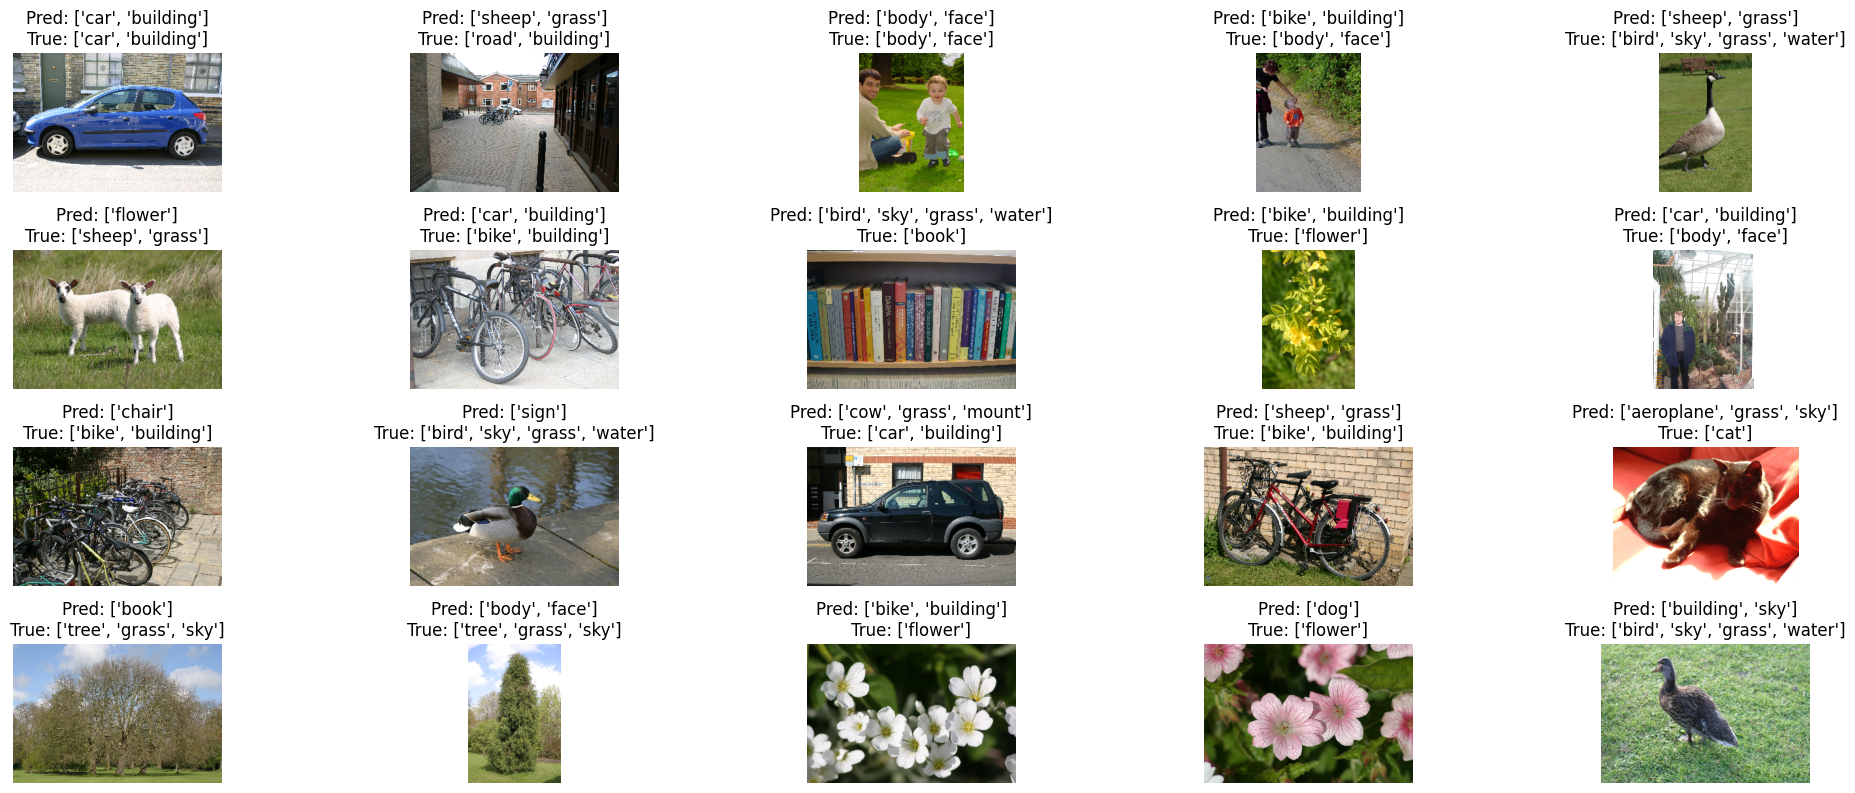

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import random

def plot_predictions(filenames, predictions, true_labels, directory, num_samples=20):
    """
    Plot a comparison of predictions and true labels for a set of images.

    Args:
    filenames (list): List of image file names.
    predictions (list): List of predicted labels.
    true_labels (dict): Dictionary mapping filenames to true labels.
    directory (str): Path to the directory containing the images.
    num_samples (int): Number of samples to plot.
    """
    random.shuffle(filenames)
    num_samples = min(num_samples, len(filenames))
    plt.figure(figsize=(20, 10))

    for i in range(num_samples):
        ax = plt.subplot(int(num_samples / 5) + 1, 5, i + 1)
        img_path = os.path.join(directory, filenames[i])
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
        else:
            continue

        predicted_label = true_labels[int(predictions[i].split("_")[0])]
        actual_label = true_labels[int(y_test_sg[i].split("_")[0])]
        title = f'Pred: {predicted_label}\nTrue: {actual_label}'
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

plot_predictions(y_test_sg, y_pred_sg, CATEGORIES_DICT, IMAGE_FOLDER)


In [ ]:
y_pred_new_sg = [CATEGORIES_DICT[int(n.split("_")[0])] for n in y_pred_sg]
y_true_sg = [CATEGORIES_DICT[int(n.split("_")[0])] for n in y_test_sg]
y_pred_new_sg[:10], y_true_sg[:10]

*Evaluating the Performance*

Multilabel Confusion Matrix:
 [[[105   7]
  [  7   0]]

 [[101  10]
  [  8   0]]

 [[102   4]
  [ 12   1]]

 [[106   6]
  [  7   0]]

 [[ 98   7]
  [ 13   1]]

 [[112   3]
  [  4   0]]

 [[ 75  21]
  [ 19   4]]

 [[104   7]
  [  5   3]]

 [[110   4]
  [  4   1]]

 [[110   4]
  [  5   0]]

 [[ 93  18]
  [  7   1]]

 [[104   7]
  [  8   0]]

 [[ 98   7]
  [ 13   1]]

 [[104   8]
  [  7   0]]

 [[ 47  29]
  [ 26  17]]

 [[109   6]
  [  3   1]]

 [[112   1]
  [  6   0]]

 [[104   8]
  [  6   1]]

 [[109   7]
  [  3   0]]

 [[ 70  18]
  [ 26   5]]

 [[105   6]
  [  8   0]]

 [[ 90   9]
  [ 18   2]]]
Classification Report:
               precision    recall  f1-score   support

   aeroplane       0.00      0.00      0.00         7
        bike       0.00      0.00      0.00         8
        bird       0.20      0.08      0.11        13
        boat       0.00      0.00      0.00         7
        body       0.12      0.07      0.09        14
        book       0.00      0.00      0.00      

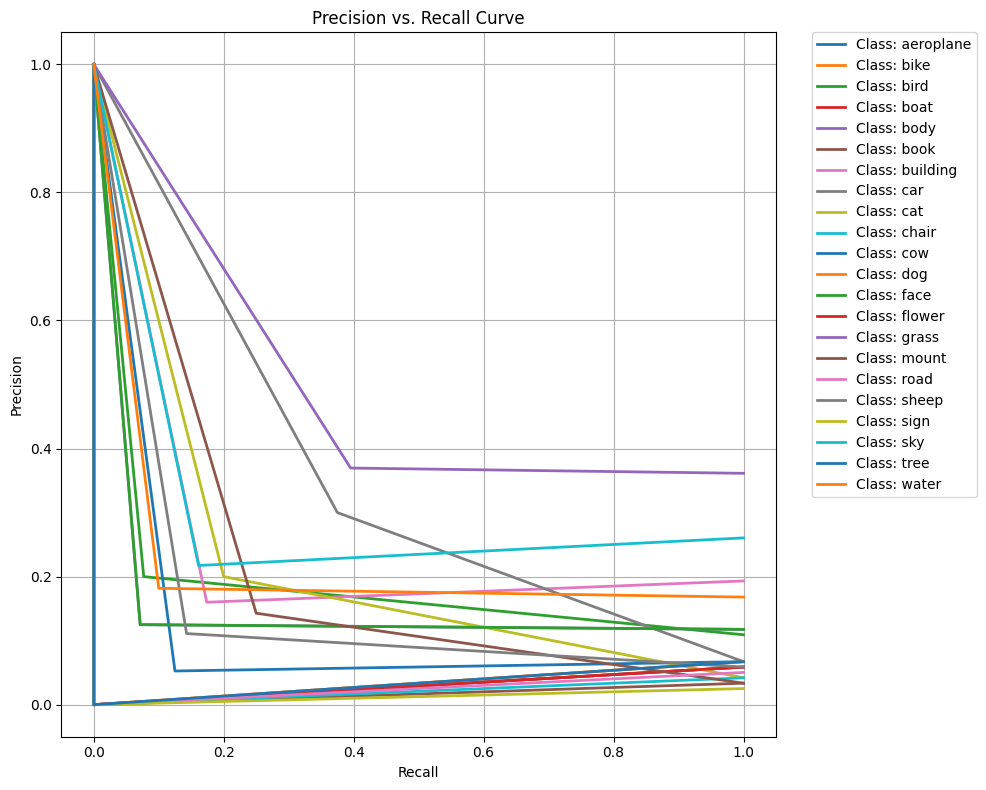

In [ ]:

# Binarize the labels
mlb = MultiLabelBinarizer()
y_true_bin = mlb.fit_transform(y_true_sg)
y_pred_bin = mlb.transform(y_pred_new_sg)

# Generate multilabel confusion matrix
mcm = multilabel_confusion_matrix(y_true_bin, y_pred_bin)
print("Multilabel Confusion Matrix:\n", mcm)

# Calculate classification report which includes precision, recall, and F1-score
report = classification_report(y_true_bin, y_pred_bin, target_names=mlb.classes_, zero_division=0)
print("Classification Report:\n", report)

# Plot Precision-Recall curve for each class
precision = dict()
recall = dict()
threshold = dict()

plt.figure(figsize=(10, 8))  # Adjust size to give more room for the legend
for i, label in enumerate(mlb.classes_):
    precision[i], recall[i], threshold[i] = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='Class: {}'.format(label))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs. Recall Curve")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)  # Move the legend outside of the plot
plt.grid(True)  # Optional: Adds grid for better readability
plt.tight_layout()  # Adjust layout to make room for the legend outside the plot
plt.show()
